In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Parameter inference in statistics, hypothesis testing

## Parameter space, null and alternative hypothesis, rejection region

<img src="figs_IV/parameter_space.drawio.png">

## Difference between a one-sided and a two-sided test

A company claims that its new battery lasts at least 10 hours on average. A researcher tests this claim by measuring battery life in a sample of batteries.

1. One-Sided (One-Tailed) Test:\
    A one-sided test checks if the battery life is less than 10 hours:
    - $H_0$: The battery lasts at 10 hours.\
        $$H_0:\mu=10$$
    - $H_1$: The battery lasts less than 10 hours.\
        $$H_1:\mu<10$$
    - This is a left-tailed test because we are only interested in values below 10.
    - If the test statistic falls in the left extreme of the distribution (below a critical value), we reject $H_0$.
2. Two-Sided (Two-Tailed) Test:\
    A two-sided test checks if the battery life is different from 10 hours (either shorter or longer):
    - $H_0$: The battery lasts exactly 10 hours.\
        $$H_0:\mu=10$$
    - $H_1$: The battery life is not 10 hours.\
        $$H_1:\mu\neq10$$
    - This is a two-tailed test because we check for both shorter and longer battery life.
    - Here, we reject $H_0$ if the test statistic falls in either tail of the distribution (too low or too high).

## Power function of a test

- The power function of a test measures the probability of correctly rejecting the null hypothesis for different values of the true parameter.\
$$\beta(\theta)=P\left(\text{Reject } H_0∣\theta\right)$$
- $\beta(\theta)$ is the probability of rejecting $H_0$ when the true parameter is $\theta$.
- Power of the test is $1−\beta(\theta)$, which is the probability of correctly rejecting $H_0$ when $H_1$ is true.

Example:
- We test for the population mean $T(x)=\overline{X}$, so the test statistic is a sample mean:
    $$H_0:\mu=50$$
    $$H_1:\mu>50$$
- We use a $Z$-test with significance level $\alpha=0.05$.
- Suppose we reject $H_0$ if $\overline{X}\geq52$.
- With this, we set a critical value (or decision boundary), therefore the rejection region is:
    $$R=\left\{x\in\mathcal{X}|\overline{X}\geq52\right\}$$.
- Note that choosing the critical value is not arbitrary and this is just an example for unknown $n$ and $\sigma$. (Will be explained later.)
- If the true mean is actually $\mu=53$ (here $H_1$ is definietly true), the power function is:
    $$\beta(53)=P\left(\overline{X}\geq52∣\mu=53\right)$$
- This can be computed using the normal distribution:
    $$P\left(Z\geq\frac{52-53}{\sigma/\sqrt{n}}\right)$$
- This gives the probability of correctly rejecting $H_0$ when $\mu=53$, which is the power at $\mu=53$.

Note: Why should we assume $H_1$ is true instead of examining the original $\mu=50$?
- Otherwise it would look like this:
    $$P\left(\overline{X}\geq52∣\mu=50\right)=\alpha$$
    which means the probability of rejecting $H_0$ if $H_0$ is true, giving a type-I error. This gives the level of the test.
    
Lets continue!
- Let the population standard deviation be $\sigma=4$ and sample size $n=16$.
- Due to the normal distribution and the known $\sigma$, we can use the $Z$-test.
    $$Z=\frac{52-53}{1}=-1$$
- Looking up the correct value in the standard table:
    $$\beta(53)=P(Z\geq -1)=1-P(Z<-1)=1-0.1587=0.8413$$
- This means that if the true population mean is 53 (so $H_1$ is true), there is an approximately 84.13% chance that our test will correctly reject the null hypothesis.

### But the true $\mu$ is 50, how does this factor into the calculation?

- Originally:
    $$\beta(\mu)=1-\Phi\left(\frac{\overline{X}-\mu}{\sigma/\sqrt{n}}+Z_{\alpha}\right)+\Phi\left(\frac{\overline{X}-\mu}{\sigma/\sqrt{n}}-Z_{\alpha}\right)$$
- Since, $\mu^*=53$ does not equal the original $\mu=50$:
    $$\beta(\mu)=1-\Phi\left(\frac{\left(\overline{X}-\mu\right)-\left(\mu^*-\mu\right)}{\sigma/\sqrt{n}}+Z_{\alpha}\right)+\Phi\left(\frac{\left(\overline{X}-\mu\right)-\left(\mu^*-\mu\right)}{\sigma/\sqrt{n}}-Z_{\alpha}\right)$$
- Here, it is plain to see that the $\mu$ terms disappear, therefore the true mean does not affect the probability.

In [2]:
z_score = -1
cdf_value = stats.norm.cdf(z_score)
print(f"Value of CDF at {z_score} is {cdf_value:<.4f}.")

beta = 1 - cdf_value
print(f"The power of the test is {beta:<.4f}.")

Value of CDF at -1 is 0.1587.
The power of the test is 0.8413.


## Level of a test

We test for the population mean $T(x)=\overline{X}$, so the test statistic is a sample mean:\
$$H_0:\mu=50$$
$$H_1:\mu>50$$

We assume:
- The population standard deviation is $\sigma=4$.
- The sample size is $n=16$. (Although $n<30$, since $\sigma$ is known using $Z$-score is still acceptable.)
- We reject $H_0$ if the sample mean $\overline{X}\geq52$ (critical value $c=52$).

What is the level of the test?

Solution:
- The level of the test is the probability of rejecting $H_0$ when $H_0$ is actually true:\
    $$\alpha=P\left(\overline{X}\geq52∣\mu=50\right)$$
- Since $\overline{X}$ follows a normal distribution:
    $$\overline{X}\sim N\left(50,\frac{4}{\sqrt{16}}\right)=N(50,1)$$
- We standardize using the Z-score formula:
    $$Z=\frac{\overline{X}-\mu}{\sigma/\sqrt{n}}=\frac{52-50}{1}=2$$
- From standard normal tables:
    $$P(Z\geq2)=1−P(Z\leq2)=1−0.9772=0.0228$$
- Thus, the level of the test is $\alpha=0.0228$.

In [3]:
z_score = 2
cdf_value = stats.norm.cdf(z_score)
print(f"Value of CDF at {z_score} is {cdf_value:<.4f}.")

alpha = 1 - cdf_value
print(f"The level of the test is {alpha:<.4f}.")

Value of CDF at 2 is 0.9772.
The level of the test is 0.0228.


## Critical value

Using the previous example, let's determine the exact critical value that corresponds to the level we computed: $\alpha=0.0228$.

- Since the test is right-tailed, the critical value $c$ satisfies:
    $$P\left(\overline{X}\geq c∣\mu=50\right)=0.0228$$
- Since $\overline{X}\sim N(50,1)$, we standardize:
    $$P\left(Z\geq \frac{c−50}{1}\right)=0.0228$$
- From the $Z$-table, the quantile for $P\left(Z\geq z_{0.0228}\right)=0.0228$ is:
    $$z_{0.0228}=2$$
- Solving for $c$:
    $$\frac{c-50}{1}=2$$
- The critical value $c$:
    $$c=50+(2\cdot1)=52$$
- So the original choice for $c$ was correct.

#### Special note: In case of two-tailed tests, there are two critical values, the boundaries of the rejection region. These are the same as the confidence interval in exactly one scenario. This occurs when the sample mean is the same as the mean condition defined under $H_0$. $\left(\overline{X}=\mu\right)$

In [4]:
z_value = stats.norm.ppf(1 - 0.0228)     #Inverse of CDF
print(f"Z-value is {z_value:<.4f}.")
#Approximately 2.

Z-value is 1.9991.


## $p$-value

Let's assume we observed a sample mean of $\overline{X}=53$. We want to compute the $p$-value.
- Calculate the $Z$-score:
    $$Z=\frac{53-50}{1}=3$$
- Since $H_1$ is $\mu>50$ (right-tailed test), the $p$-value is the area to the right of the calculated $Z$-score in the standard normal distribution.
    $$p\text{-value}=P(Z>3)=1-P(Z\leq3)=1-0.9987=0.0013$$
- This is much smaller than the significance level ($\alpha$ = 0.0228), so we would reject the null hypothesis.
- Note: If you had a different observed sample mean, you would need to recalculate the z-score and p-value accordingly.

### In the context of extreme statistics

- The $p$-value measures how extreme a test statistic is under the assumption that $H_0$ is true.
- Def.: The $p$-value is the probability of obtaining a test statistic as extreme as or more extreme than the observed value, given that $H_0$ is true.
- More extreme statistic $\rightarrow$ Smaller $p$-value
    - If the observed test statistic falls far into the tail of the null distribution, the p-value is small.
    - This suggests that such an extreme result is unlikely under $H_0$, leading to rejection of $H_0$.
- Less extreme statistic $\rightarrow$ Larger $p$-value
    - If the observed statistic is close to the center of the null distribution, the p-value is large.
    - This suggests that the result is likely under $H_0$, so we do not reject $H_0$.

In [5]:
z_score = 3
cdf_value = stats.norm.cdf(z_score)
print(f"Value of CDF at {z_score} is {cdf_value:<.4f}.")

alpha = 1 - cdf_value
print(f"The level of the test is {alpha:<.4f}.")

Value of CDF at 3 is 0.9987.
The level of the test is 0.0013.


## Commonly used test statistics in hypothesis testing

1. $Z$-statistic ($Z$-score, sometimes called $u$-test)
- Used in $Z$-tests for large sample sizes ($n\geq30$)
- Applied when the population standard deviation ($\sigma$) is known
- Formula:
    $$Z=\frac{\overline{X}-\mu_0}{\sigma/\sqrt{n}}$$

2. $t$-statistic ($t$-score)
- Used in $t$-tests for small sample sizes ($n<30$)
- Applied when the population standard deviation is unknown
- Formula:
    $$t=\frac{\overline{X}-\mu_0}{se/\sqrt{n}}$$

3. Chi-Square statistic ($\chi^2$)
- Used in Chi-Square tests (goodness of fit, independence, homogeneity)
- Compares observed vs. expected frequencies
- Formula:
    $$\chi^2=\sum\frac{(O-E)^2}{E}$$

4. F-statistic:
- Used in ANOVA (Analysis of Variance) to test whether multiple groups have the same mean.
- Compares variances between groups.
- Formula:
    $$F=\frac{\text{Variance between groups}}{\text{Variance within groups}}$$

5. Wilcoxon Signed-Rank Test Statistic
- Used in non-parametric tests for paired data.
- Compares the median of a single sample to a known value or to compare two paired samples (dependent groups) when the normality assumption is questionable.
- Do two samples come from the same distribution/cluster?
- An alternative to the $t$-test when normality is not assumed.

6. Mann-Whitney $u$-test
- Used in non-parametric tests for independent samples.
- Compares two independent groups to determine if one tends to have higher values than the other.
- An alternative to the two-sample $t$-test when normality is not assumed.

### $\chi^2$ test

A school administrator wants to check if there is a relationship between students' study habits and their pass/fail rates in a final exam.\
Two categorical variables:
- Study Habit: "Regular", "Occasional", "Rare"
- Exam Outcome: "Pass" or "Fail"

The school surveys 100 students and organizes the results into a contingency table.

$H_0$: Study habits and exam outcomes are independent.
$H_1$: Study habits and exam outcomes are dependent.

In [2]:
# Observed frequency table
observed = np.array([[40, 10], [20, 15], [5, 10]])

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Square Statistic: {chi2_stat:<.4f}")
print(f"p-value: {p_value:<.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: Study habits and exam outcome are dependent.")
else:
    print("Fail to reject H0: No significant relationship.")

Chi-Square Statistic: 12.5065
p-value: 0.0019
Degrees of Freedom: 2
Expected Frequencies:
 [[32.5  17.5 ]
 [22.75 12.25]
 [ 9.75  5.25]]
Reject H0: Study habits and exam outcome are dependent.


### F-statistic

A teacher wants to test if three different teaching methods lead to different average test scores among students.
- Method A: Traditional lectures
- Method B: Online learning
- Method C: Interactive workshops

The teacher collects test scores from randomly selected students for each method.

$H_0$: All three teaching methods lead to the same average score ($\mu_A=\mu_B=\mu_C$).\
$H_1$: At least one group has a different mean.

In [3]:
# Test scores for each method
method_A = [80, 85, 88, 92, 95]
method_B = [78, 83, 85, 87, 89]
method_C = [85, 86, 90, 92, 96]

# Perform one-way ANOVA
F_statistic, p_value = stats.f_oneway(method_A, method_B, method_C)

print(f"F-statistic: {F_statistic:<.4f}, p-value: {p_value:<.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: At least one teaching method has a different mean score.")
else:
    print("Fail to reject H0: No significant difference among the methods.")

F-statistic: 1.5641, p-value: 0.2491
Fail to reject H0: No significant difference among the methods.


### Wilcoxon signed-rank test

A company wants to test whether a new training program improves employee performance.
- They take the test before and after training.
- We use the Wilcoxon signed-rank test to check whether the median performance score has significantly changed.

$H_0$: The median difference is zero (no change in performance).\
$H_1$: The median difference is not zero (performance changed).

In [8]:
pre_training = [70, 82, 90, 65, 88, 76, 80, 85]
post_training = [75, 88, 92, 70, 86, 80, 85, 90]

# Perform Wilcoxon signed-rank test
stat, p_value = stats.wilcoxon(pre_training, post_training)

print(f"Test Statistic: {stat:<.4f}, p-value: {p_value:<.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: The training had a significant effect on performance.")
else:
    print("Fail to reject H0: No significant change in performance.")

Test Statistic: 1.5000, p-value: 0.0234
Reject H0: The training had a significant effect on performance.


### Mann-Whitney 𝑢-test
A researcher wants to compare two study techniques to see if one leads to higher test scores than the other.
- Group A: Students using the self-study method
- Group B: Students using the tutor-assisted method

Each group consists of 6 students.

$H_0$: Both groups have the same distribution of test scores.\
$H_1$: The tutor-assisted group tends to have higher scores than the self-study group.

Since we are testing if one group has higher values than the other, we use a one-tailed test.

In [9]:
# Test scores for each group
self_study = [78, 82, 88, 94, 96, 99]
tutor_assisted = [85, 88, 91, 89, 92, 95]

# Perform Mann-Whitney U-test (one-tailed)
U_statistic, p_value = stats.mannwhitneyu(self_study, tutor_assisted, alternative="less")

print(f"U-statistic: {U_statistic:<.4f}, p-value: {p_value:<.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: The tutor-assisted group has significantly higher scores.")
else:
    print("Fail to reject H0: No significant difference between groups.")

U-statistic: 18.5000, p-value: 0.5637
Fail to reject H0: No significant difference between groups.


## How to check for normality?

1. Histogram plot
    - Bell-shaped curve: normal dist.
2. Quantile-Quantile plot (Q-Q plot)
    - Compares the data's quantiles to those of a normal dist.
    - If points fall along the 45-degree line, the data is approximately normal.
3. Central limit theorem (rule of thumb)
4. Statistical normality tests
    - Shapiro-Wilk test
        - $H_0$: normal dist., $H_1$: not normal dist., at $p\text{-value}<0.05$ reject $H_0$
        - Worse for large $n$
    - Anderson-Darling test
        - Same as S-W test but for different significance levels too
        - Sensitive to deviations in tails
    - Kolmogorov-Smirnov test
        - Compares data to normal dist.
        - Worse for small $n$

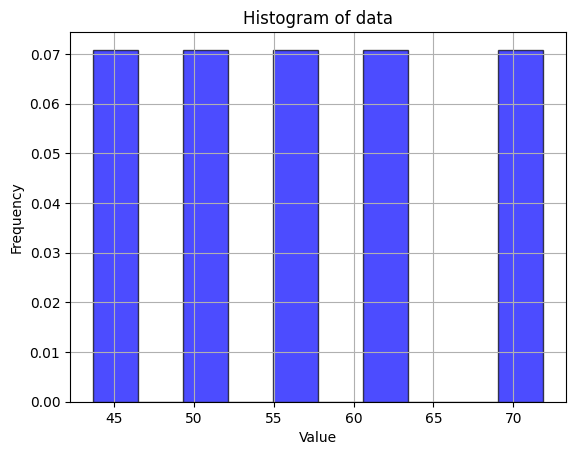

In [23]:
# Generate sample data (example)
data = np.random.normal(loc=50, scale=10, size=5)

# Plot histogram
plt.hist(data, bins=10, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of data")
plt.grid()
plt.show()

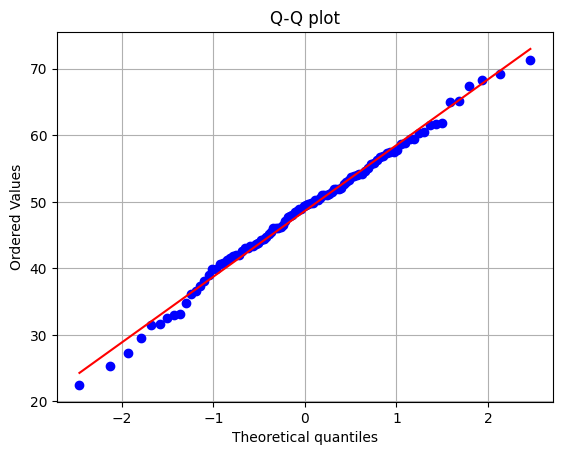

In [17]:
# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.grid()
plt.show()

In [15]:
stat, p_value = stats.shapiro(data)
print(f"Shapiro-Wilk test: p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Data is NOT normally distributed (Reject H0)")
else:
    print("Data is normally distributed (Fail to Reject H0)")

Shapiro-Wilk test: p-value = 0.5551
Data is normally distributed (Fail to Reject H0)


In [26]:
result = stats.anderson(data, dist="norm")
print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

if result.statistic > result.critical_values[2]:  # Compare at 5% level
    print("Data is NOT normally distributed (Reject H0 at 5%)")
else:
    print("Data is normally distributed (Fail to Reject H0 at 5%)")

Anderson-Darling Test Statistic: 0.5766994402256245
Critical Values: [0.555 0.632 0.759 0.885 1.053]
Significance Levels: [15.  10.   5.   2.5  1. ]
Data is normally distributed (Fail to Reject H0 at 5%)


In [24]:
stat, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
print(f"K-S Test: p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Data is NOT normally distributed (Reject H0)")
else:
    print("Data is normally distributed (Fail to Reject H0)")

K-S Test: p-value = 0.9983
Data is normally distributed (Fail to Reject H0)


## Some homework

1. A factory claims that its light bulbs last on average 800 hours. A sample of $n=25$ bulbs has a sample mean lifetime of 780 hours, with a known population standard deviation of 50 hours.\
    Test the hypothesis $H_0:\mu=800$ vs. $H_1:\mu<800$ at 5% significance. Compute the power function for $\mu=770$.\
    Hint: Firstly, compute the critical value $c$ using the $Z$-score at $\alpha$ with $\mu=800$. Secondly, compute the power function
     $P\left(\overline{X}\leq c|\mu=770\right)$.
2. A researcher tests whether a new fertilizer increases plant growth. The null hypothesis is that the mean plant height is 50 cm.\
    If the sample mean is 52 cm, standard deviation is 5 cm, and $n=36$, compute the power of the test at $\mu=53$, given a 5% significance level.
3. A drug manufacturer claims that its painkiller provides relief in 30 minutes. A test is conducted where $n=20$ patients take the drug, and the sample mean relief time is 28 minutes with a sample standard deviation of 4 minutes.\
    Compute the level of the test if the rejection region is set at $\overline{X}\leq27$.\
    Hint: Firstly, compute the test statistic ($t$-test). Secondly, compute the level $P\left(\overline{X}\leq 27|\mu=30\right)$.
4. A company tests a new battery and wants to control the probability of falsely rejecting the null hypothesis $H_0:\mu=500$ hours.\
    If they set a critical value of 490 hours based on a sample of $n=40$ and a standard deviation of 20 hours, find the level of the test.
5. A researcher conducts a two-tailed test for the mean cholesterol level of a population with $H_0:\mu=200$. The sample size is $n=36$, and the population standard deviation is 15.\
    Find the critical values for a 1% significance level.\
    Hint: First, compute the critical $Z$-values. (2-sided test: 2 critical $Z$s at $\alpha/2$ and $(1-\alpha/2)$) Then, compute the lower and upper critical values.
6. In a quality control test, the weight of a product is tested using a one-tailed test at a 5% significance level. If the sample size is 25, and the population standard deviation is 3, determine the critical value for rejecting $H_0:\mu\geq10$.
7. A survey shows that the average time students spend studying is 4.5 hours per day. A test is conducted with a sample of $n=49$, finding a sample mean of 4.2 hours and a population standard deviation of 1.4 hours.\
    Compute the $p$-value for testing $H_0:\mu=4.5$ vs. $H_1:\mu\neq4.5$.\
    Hint: First, compute the $Z$-test statistic. Then, compute the $p$-value. This is a 2-sided test: $p\text{-value}=2\cdot P(Z<z)$.
8. A researcher tests whether a new diet plan reduces average body weight. The null hypothesis states that the average weight before the diet is 75 kg. After a month, a sample of $n=16$ people has an average weight of 72 kg with a sample standard deviation of 6 kg.\
    Compute the $p$-value for testing $H_0:\mu=75$ vs. $H_1:\mu<75$.